In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Load the dataset 
load diabetes_data

In [7]:
df = pd.read_csv('diabetes_data.csv')
df["one"]=1
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,one
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1


## Divide the dataset into train and test datasets

In [8]:
from sklearn.model_selection import train_test_split
# X=df[df.columns.difference(["Outcome"])]
X=df[["one","Pregnancies"]]
y=df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [9]:
def sigmoid(X):
    
    
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
    return 1/(1+math.e**((-X)))

In [19]:
sigmoid(X_train["Pregnancies"])

663    0.999877
712    0.999955
161    0.999089
509    0.999665
305    0.880797
         ...   
645    0.880797
715    0.999089
72     0.999998
235    0.982014
37     0.999877
Name: Pregnancies, Length: 614, dtype: float64

In [11]:
def logistic_func(beta, X):
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
    
    #inch beta?? menq chpti estimate anenq? te talisenq miban heto inq@ uxuma?
    m=X.dot(beta.T)
    
    return sigmoid(m)

In [21]:
beta=np.array([0.2,0.5])
logistic_func(beta,X_train)

663    0.990987
712    0.994514
161    0.975873
509    0.985226
305    0.768525
         ...   
645    0.768525
715    0.975873
72     0.998771
235    0.900250
37     0.990987
Length: 614, dtype: float64

In [22]:
def gradient(beta, X, Y):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
    gradient=(logistic_func(beta,X)-Y).T.dot(X)

    return gradient

In [23]:
gradient(beta,X_train,y_train)

one             285.534130
Pregnancies    1178.778993
dtype: float64

In [17]:
def cost_func(X, Y, beta):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    
    """
    cost=1/len(X)*(
        -Y.dot(np.log(logistic_func(beta,X)))
        -(1-Y)*np.log(1-logistic_func(beta,X))
                  
                  )
#     incha veradzardznum cost function@?
    return cost

In [24]:

cost_func(X_train,y_train,beta)

663    0.064430
712    0.064430
161    0.070496
509    0.071295
305    0.066813
         ...   
645    0.066813
715    0.064430
72     0.064430
235    0.064430
37     0.064430
Length: 614, dtype: float64

In [25]:
def gradient_descent(beta,X, Y, epsilon=1e-6, step_size=1e-4, max_steps=1000):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    for i in range(0,max_steps):
        beta=beta-step_size*gradient(beta,X,Y)+ epsilon*(np.sum(beta**2))
    

    return beta

In [30]:
beta0=gradient_descent(beta,X_train,y_train)[0]
#xia df-i columnerov berum? es iroq betana?
beta1=gradient_descent(beta,X_train,y_train)[1]
print(beta0,beta1)

-1.1585851211091118 0.13030357949266821


In [37]:
#how to calculate y_pred
#how to get sklearn betas
#how to get festures with best accuracy?
#how to use gradient on logistic??
#can we use ridge for logistic??

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [38]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Artur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Use the logistic regression available in Sklearn on the same data.

In [39]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[94,  5],
       [46,  9]], dtype=int64)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6688311688311688
Precision: 0.6428571428571429
Recall: 0.16363636363636364


## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

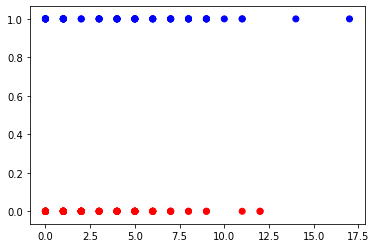

In [52]:
color=["red","blue"]
plt.scatter(X_test["Pregnancies"],y_test,c=[color[i] for i in y_test])